In [8]:
from ultralytics import YOLO

# Initialize a YOLO-World model
model = YOLO("../../model/yolov8x-worldv2.pt")  # or select yolov8m/l-world.pt

# Define custom classes
model.set_classes(["tape", "clamp", "tool", "bottle", "tape measure", "stapler", "pen", "scissor", "mouse", "charger", "keyboard", "blue box"])

# Save the model with the defined offline vocabulary
model.save("../../model/custom_yolov8x_worldv2_1.pt")


In [9]:

# Load your custom model
model = YOLO("../../model/custom_yolov8x_worldv2_1.pt")


In [14]:
image_path="/home/fyp/Pictures/TestSeg/many_things_on_table.jpg"
# image_path="/home/fyp/Pictures/TestSeg/bottle_tape.jpg"
# Execute prediction for specified categories on an image
results = model.predict(image_path)


image 1/1 /home/fyp/Pictures/TestSeg/many_things_on_table.jpg: 480x640 2 tapes, 1 tape measure, 2 pens, 1 scissor, 1 mouse, 2 keyboards, 27.5ms
Speed: 15.0ms preprocess, 27.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


In [15]:
# results = model(image_path)  # predict on an image

# Access the results
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box
    print(1)
print(type(results))
print(len(results))
# print(results[0].names)


1
<class 'list'>
1


In [16]:
print(names)
print(xywh)

['pen', 'mouse', 'tape measure', 'tape', 'scissor', 'keyboard', 'pen', 'keyboard', 'tape']
tensor([[ 928.4995,  742.3150,  214.8542,  246.3793],
        [1111.4143,  409.7825,  221.6976,  126.6553],
        [ 288.9254,  691.7886,  190.5047,  149.6899],
        [ 517.6387,  855.6984,  294.6819,  288.5640],
        [ 827.4644,  453.9671,  292.7316,  144.3066],
        [1580.4081,  149.7535,  243.1838,  299.5070],
        [ 609.4242,  520.0543,  177.4172,   62.4956],
        [1622.5759,  151.6100,  158.8481,  303.0782],
        [1391.3938,  691.3521,  257.7704,  302.4578]], device='cuda:0')


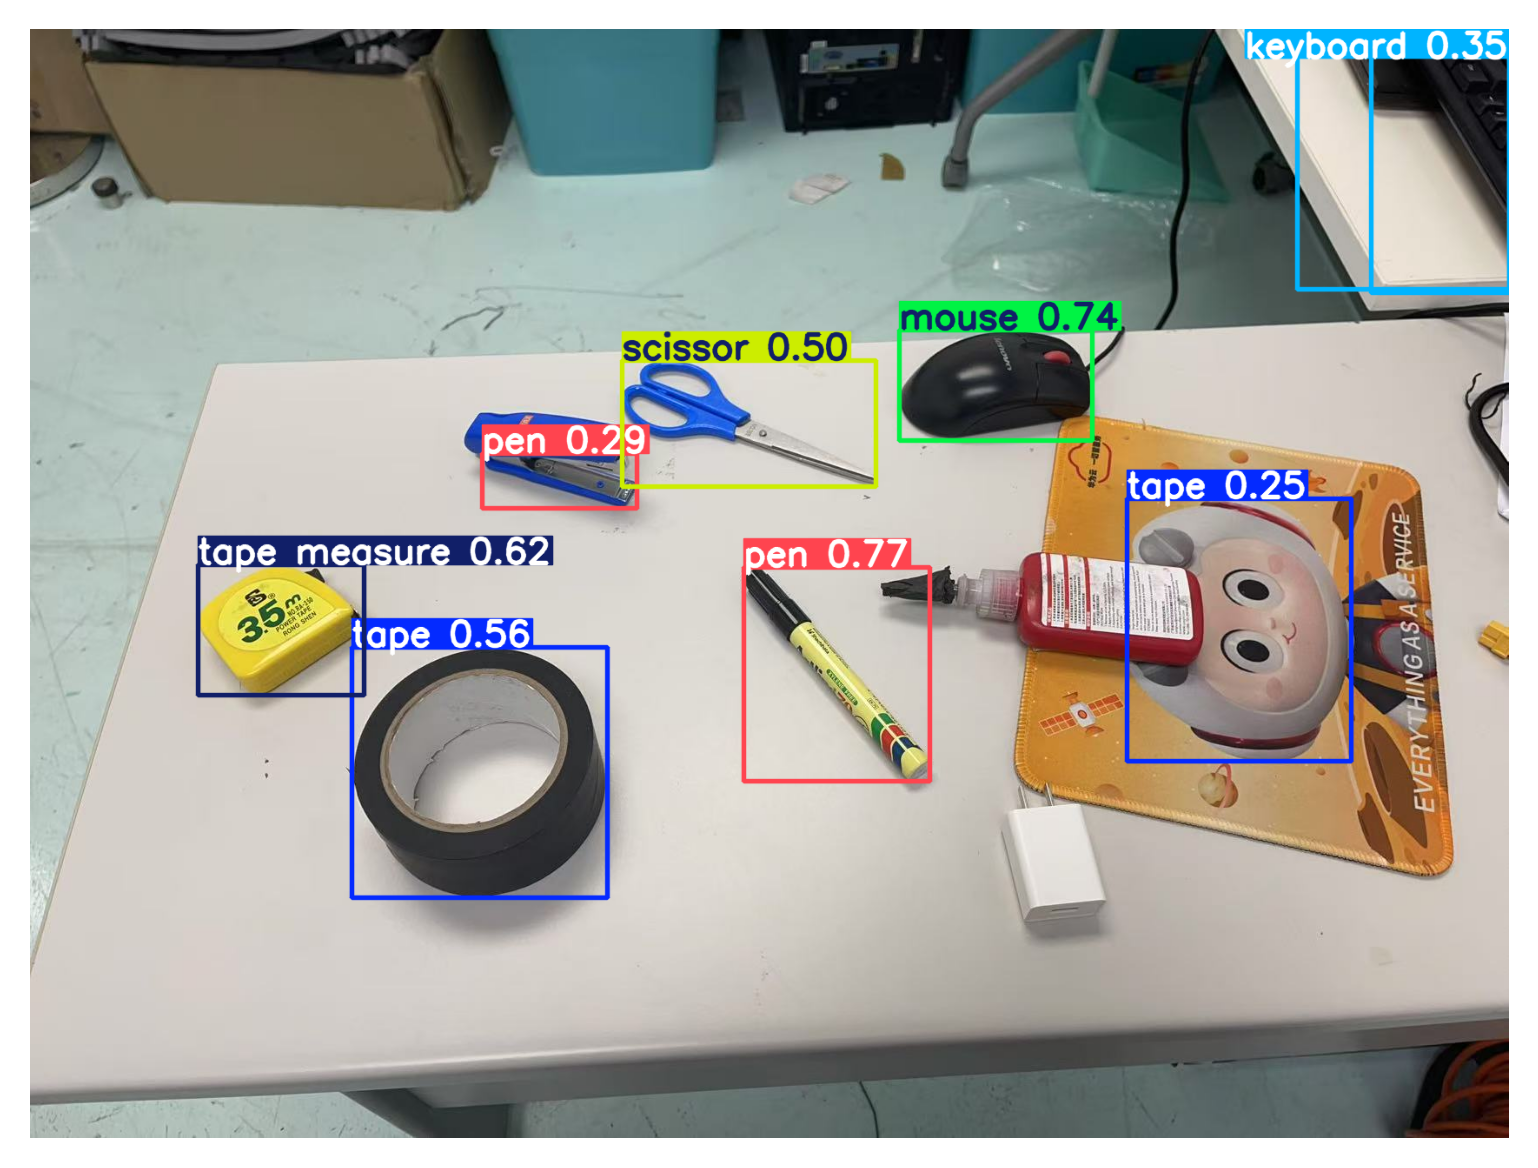

Image width: 1702, Image height: 1276


In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
from PIL import Image

# Draw the results on the image
annotated_image = results[0].plot()

# Convert the image to a format suitable for Matplotlib
annotated_image = Image.fromarray(annotated_image[..., ::-1])

# Display the image in the Jupyter Notebook
plt.rcParams['figure.dpi'] = 300
plt.imshow(annotated_image)
plt.axis('off')
plt.show()
# Print the size of the annotated image
width, height = annotated_image.size
print(f"Image width: {width}, Image height: {height}")


In [9]:
xywh

tensor([[2285.0156, 1358.0132,  631.8397,  772.0001],
        [ 789.8627,  680.4965, 1576.8600, 1353.5319],
        [1902.7991,  189.9008,  664.1499,  379.8017]], device='cuda:0')

In [6]:
xywh.cpu().detach().numpy().tolist()

[[1169.9774169921875, 2018.0146484375, 490.12017822265625, 676.6168212890625],
 [2117.96826171875, 1021.9503173828125, 2246.8681640625, 1098.0595703125]]